In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('data/new_health.csv')
data = data.drop(columns = ['Unnamed: 0'])

In [3]:
data.columns

Index(['RELIG_SERVICES_12month', 'RELIG_IMPORTANT', 'RELIG_influ_decision',
       'friend_SHARE_REL', 'YEAR', 'Tabacco_Flag', 'Alcohol_Flag',
       'Marijunana_Flag', 'Marijuana_Only_Flag', 'Cocaine_Flag', 'Crack_Flag',
       'Herion_Flag', 'Hallcinogens_Flag', 'Inhalants_Flag', 'Painkiller_Flag',
       'Tranquilizer_Flag', 'Stimulant Flag', 'CPN_Meth_Flag', 'Meth_Flag',
       'Sedatives Flag', 'Any_Drug_Flag', 'Any_Drug_Past_Year',
       'Any_Drug_Past_Month', 'Age_First_Use', 'Year_First_Use',
       'Drug_Not_Marijunana', 'Ever_Steal_50', 'Sell_Illegal_Drugs',
       'Ever_Booked_Arrested', 'Drug_or_Alc_Past_year', 'inpatient',
       'outpatient', 'needed_not_rcvd', 'rcvd_any_tmt',
       'suic_thought_pst_12month', 'psych_distress_month', 'psych_distress_yr',
       'suic_thought_pst_yr', 'suic_plan', 'suic_attempt', 'whodas_score',
       'predicted_ment_ill', 'svrl_days_depressed', 'lifetime_mde',
       'pst_yr_mde', 'age', 'HEALTH', 'IRSEX', 'IRMARIT', 'EDUCCAT2',
      

In [4]:
data = data.drop(columns = ['suic_thought_pst_12month', 
                            'suic_thought_pst_yr', 'suic_plan', 'suic_attempt'])

In [5]:
data.columns

Index(['RELIG_SERVICES_12month', 'RELIG_IMPORTANT', 'RELIG_influ_decision',
       'friend_SHARE_REL', 'YEAR', 'Tabacco_Flag', 'Alcohol_Flag',
       'Marijunana_Flag', 'Marijuana_Only_Flag', 'Cocaine_Flag', 'Crack_Flag',
       'Herion_Flag', 'Hallcinogens_Flag', 'Inhalants_Flag', 'Painkiller_Flag',
       'Tranquilizer_Flag', 'Stimulant Flag', 'CPN_Meth_Flag', 'Meth_Flag',
       'Sedatives Flag', 'Any_Drug_Flag', 'Any_Drug_Past_Year',
       'Any_Drug_Past_Month', 'Age_First_Use', 'Year_First_Use',
       'Drug_Not_Marijunana', 'Ever_Steal_50', 'Sell_Illegal_Drugs',
       'Ever_Booked_Arrested', 'Drug_or_Alc_Past_year', 'inpatient',
       'outpatient', 'needed_not_rcvd', 'rcvd_any_tmt', 'psych_distress_month',
       'psych_distress_yr', 'whodas_score', 'predicted_ment_ill',
       'svrl_days_depressed', 'lifetime_mde', 'pst_yr_mde', 'age', 'HEALTH',
       'IRSEX', 'IRMARIT', 'EDUCCAT2', 'NEWRACE2', 'EMPSTATY'],
      dtype='object')

In [6]:
from matplotlib import pyplot as plt
import numpy as np

<AxesSubplot:>

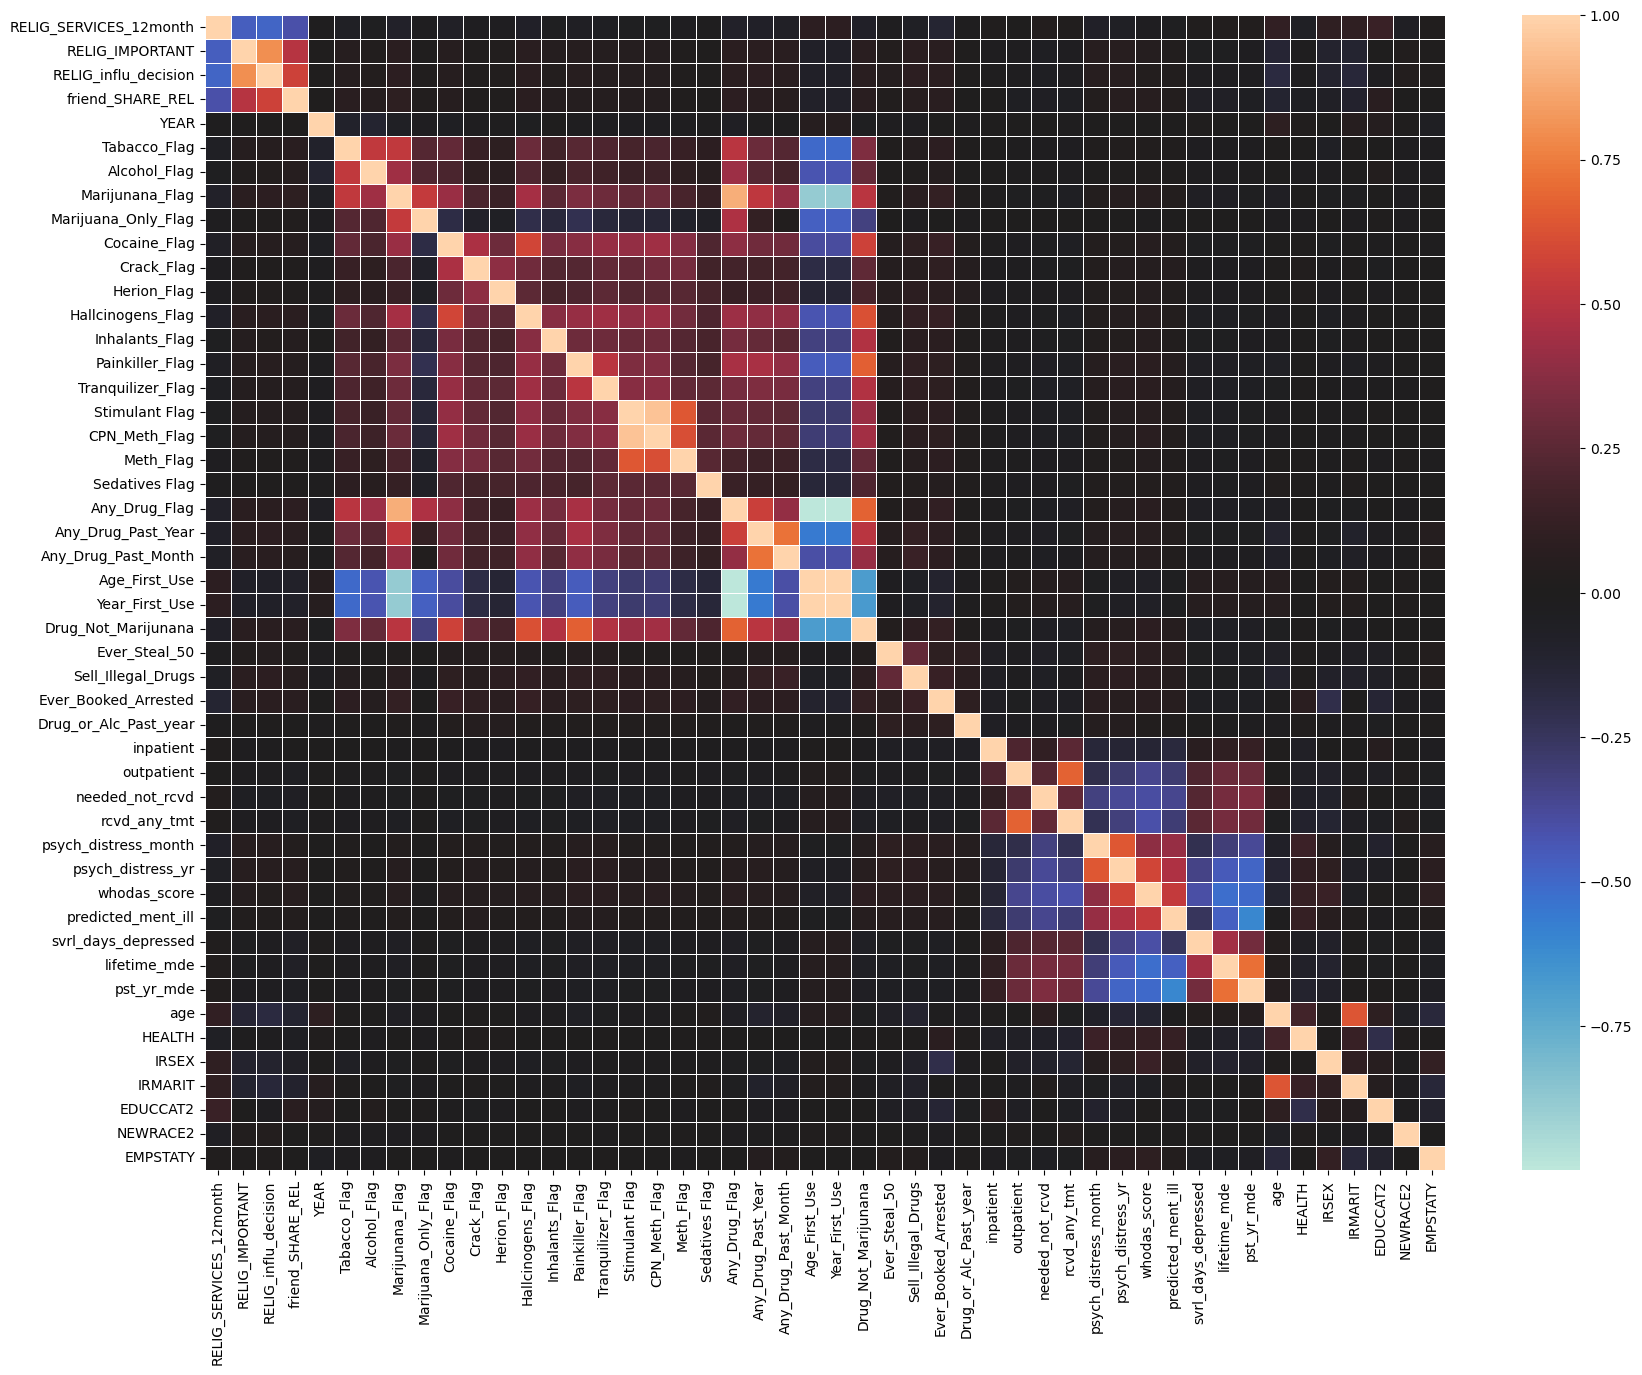

In [8]:
plt.subplots(figsize=(20,15))
sns.heatmap(data.corr(), center = 0, linewidths = 0.5)
#cmap="PiYG"

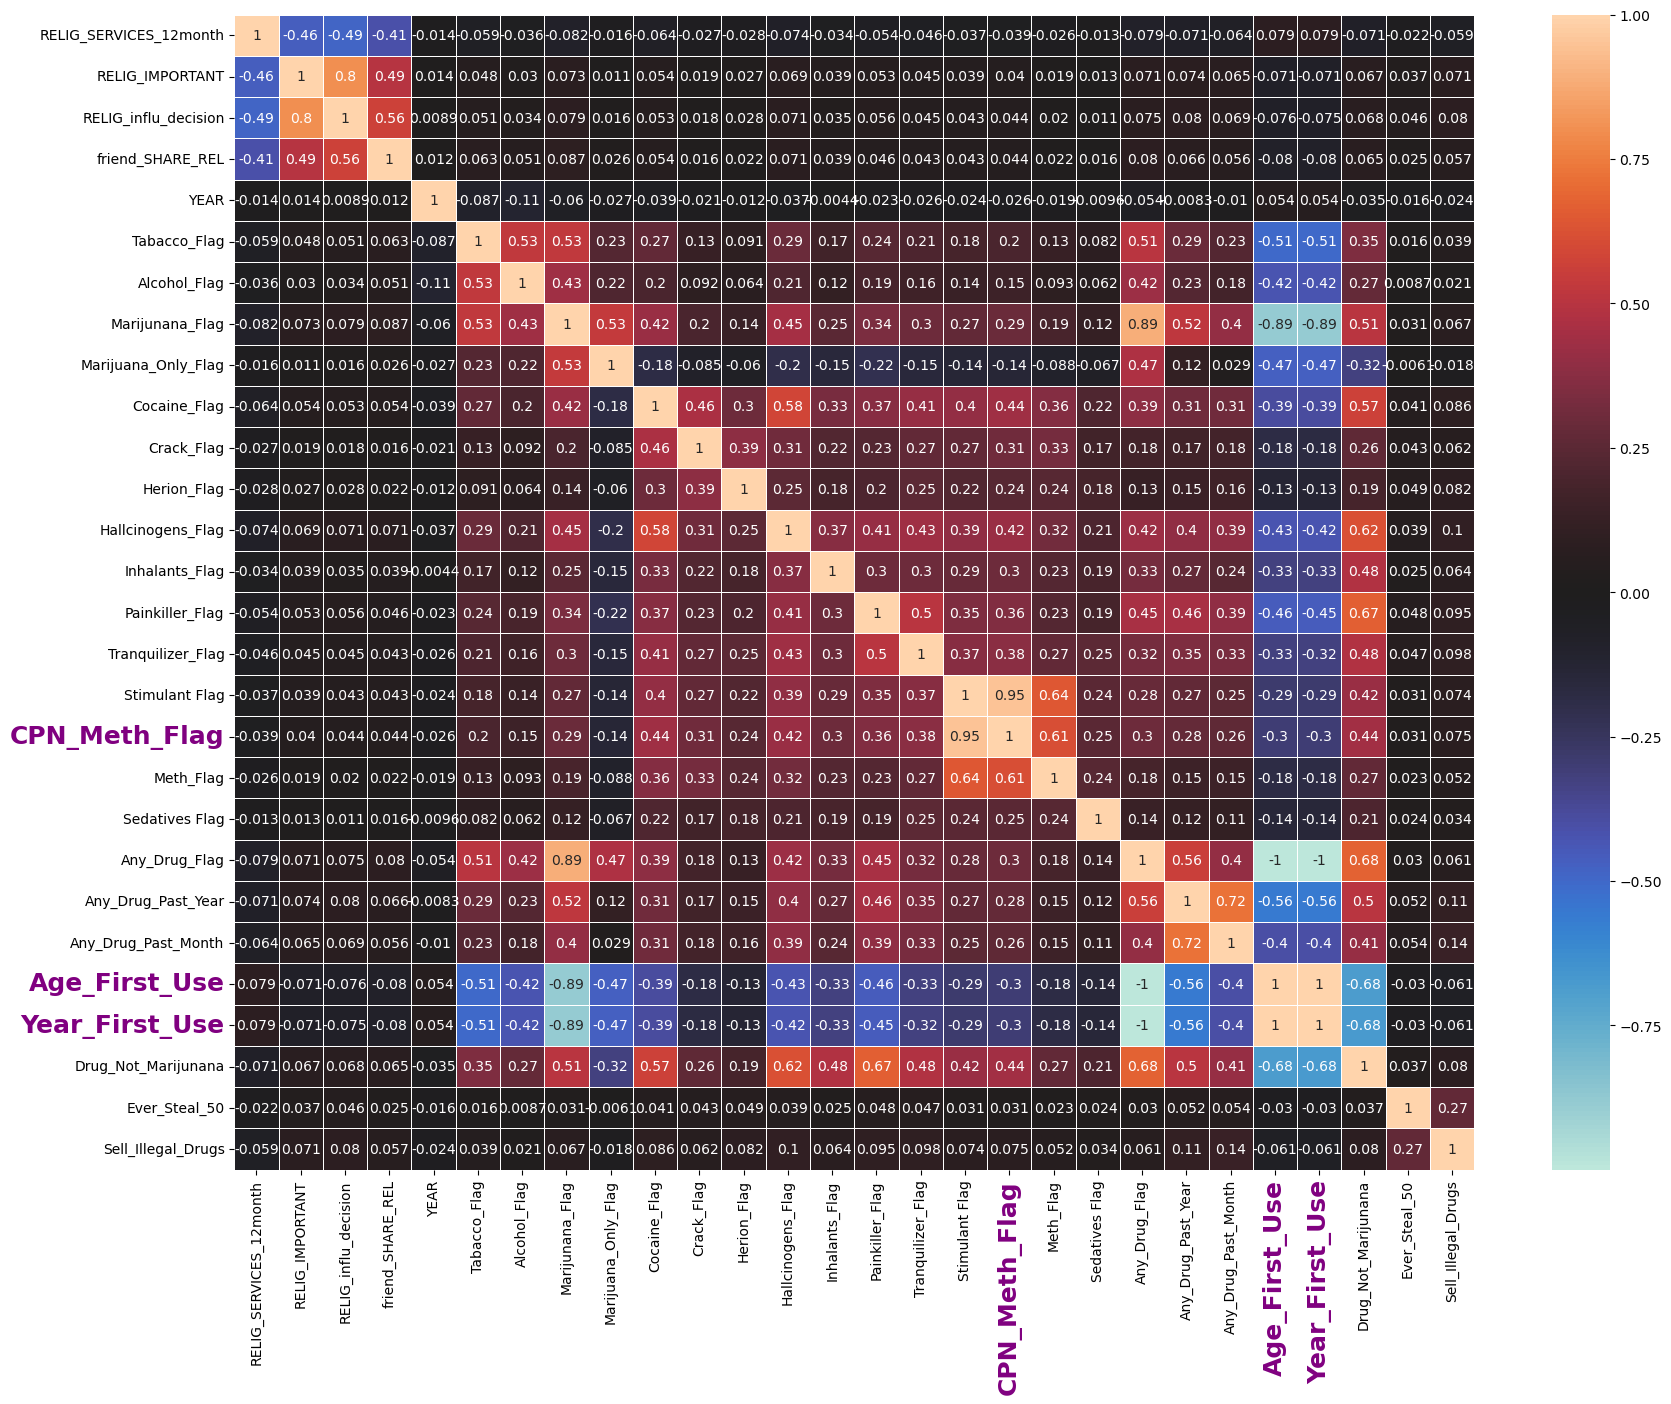

In [41]:
sub1 = data.iloc[: , :28]
plt.subplots(figsize=(20,15))

ax = sns.heatmap(sub1.corr(), annot=True, center = 0, linewidths = 0.5)

for lab, annot in zip(ax.get_xticklabels(), ax.texts):
    text = lab.get_text()
    if text == 'Age_First_Use' or text == 'Year_First_Use' or text == 'CPN_Meth_Flag': 
        # set the properties of the ticklabel
        lab.set_weight('bold')
        lab.set_size(18)
        lab.set_color('purple')

for lab, annot in zip(ax.get_yticklabels(), ax.texts):
    text = lab.get_text()
    if text == 'Age_First_Use' or text == 'Year_First_Use' or text == 'CPN_Meth_Flag': 
        # set the properties of the ticklabel
        lab.set_weight('bold')
        lab.set_size(18)
        lab.set_color('purple')

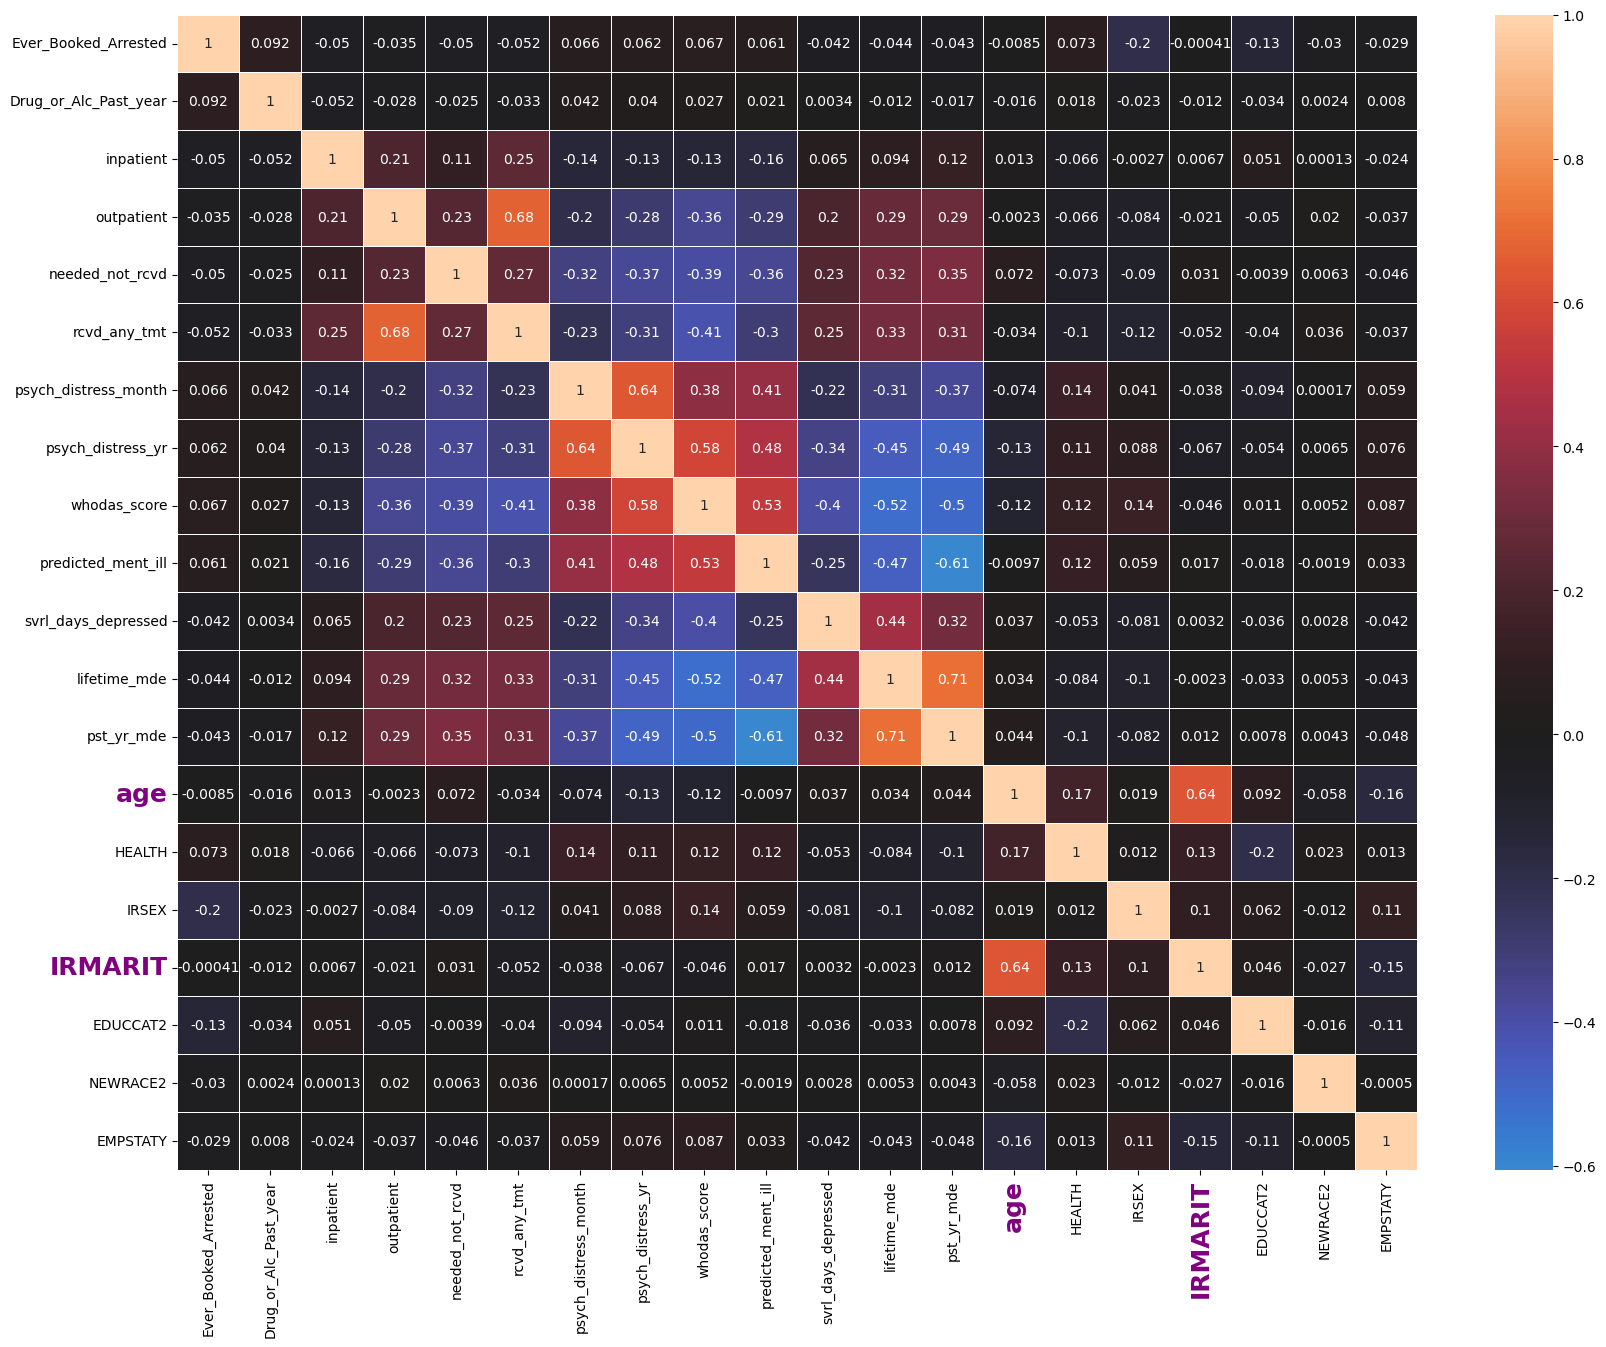

In [43]:
sub2 = data.iloc[: , 28:]
plt.subplots(figsize=(20,15))

ax = sns.heatmap(sub2.corr(), annot=True, center = 0, linewidths = 0.5)

#marital status and age
for lab, annot in zip(ax.get_xticklabels(), ax.texts):
    text = lab.get_text()
    if text == 'age' or text == 'IRMARIT': 
        # set the properties of the ticklabel
        lab.set_weight('bold')
        lab.set_size(18)
        lab.set_color('purple')

for lab, annot in zip(ax.get_yticklabels(), ax.texts):
    text = lab.get_text()
    if text == 'age' or text == 'IRMARIT': 
        # set the properties of the ticklabel
        lab.set_weight('bold')
        lab.set_size(18)
        lab.set_color('purple')